In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Import Common Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Linear Regression

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Assignment/Housing.csv')

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

using for missing value checking

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
df['mainroad']=enc.fit_transform(df[['mainroad']])
df['guestroom']=enc.fit_transform(df[['guestroom']])
df['basement']=enc.fit_transform(df[['basement']])
df['hotwaterheating']=enc.fit_transform(df[['hotwaterheating']])
df['airconditioning']=enc.fit_transform(df[['airconditioning']])
df['prefarea']=enc.fit_transform(df[['prefarea']])


In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


when it maintains order,ordinal
when we use what encoder we need to know

In [ ]:
rank=['unfurnished','semi-furnished','furnished']
oe=OrdinalEncoder(categories=[rank])
df['furnishingstatus']=oe.fit_transform(df[['furnishingstatus']])

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,2.0
1,12250000,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,2.0
2,12250000,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,1.0
3,12215000,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,2.0
4,11410000,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,2.0


catagorize with ranking

In [ ]:
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='price', ylabel='Density'>

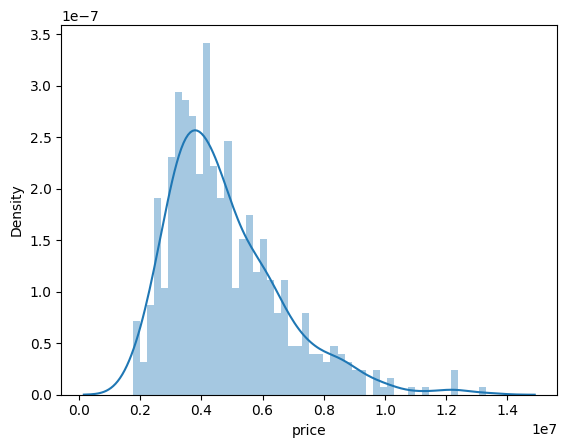

In [ ]:
sns.distplot(df['price'],bins=50)

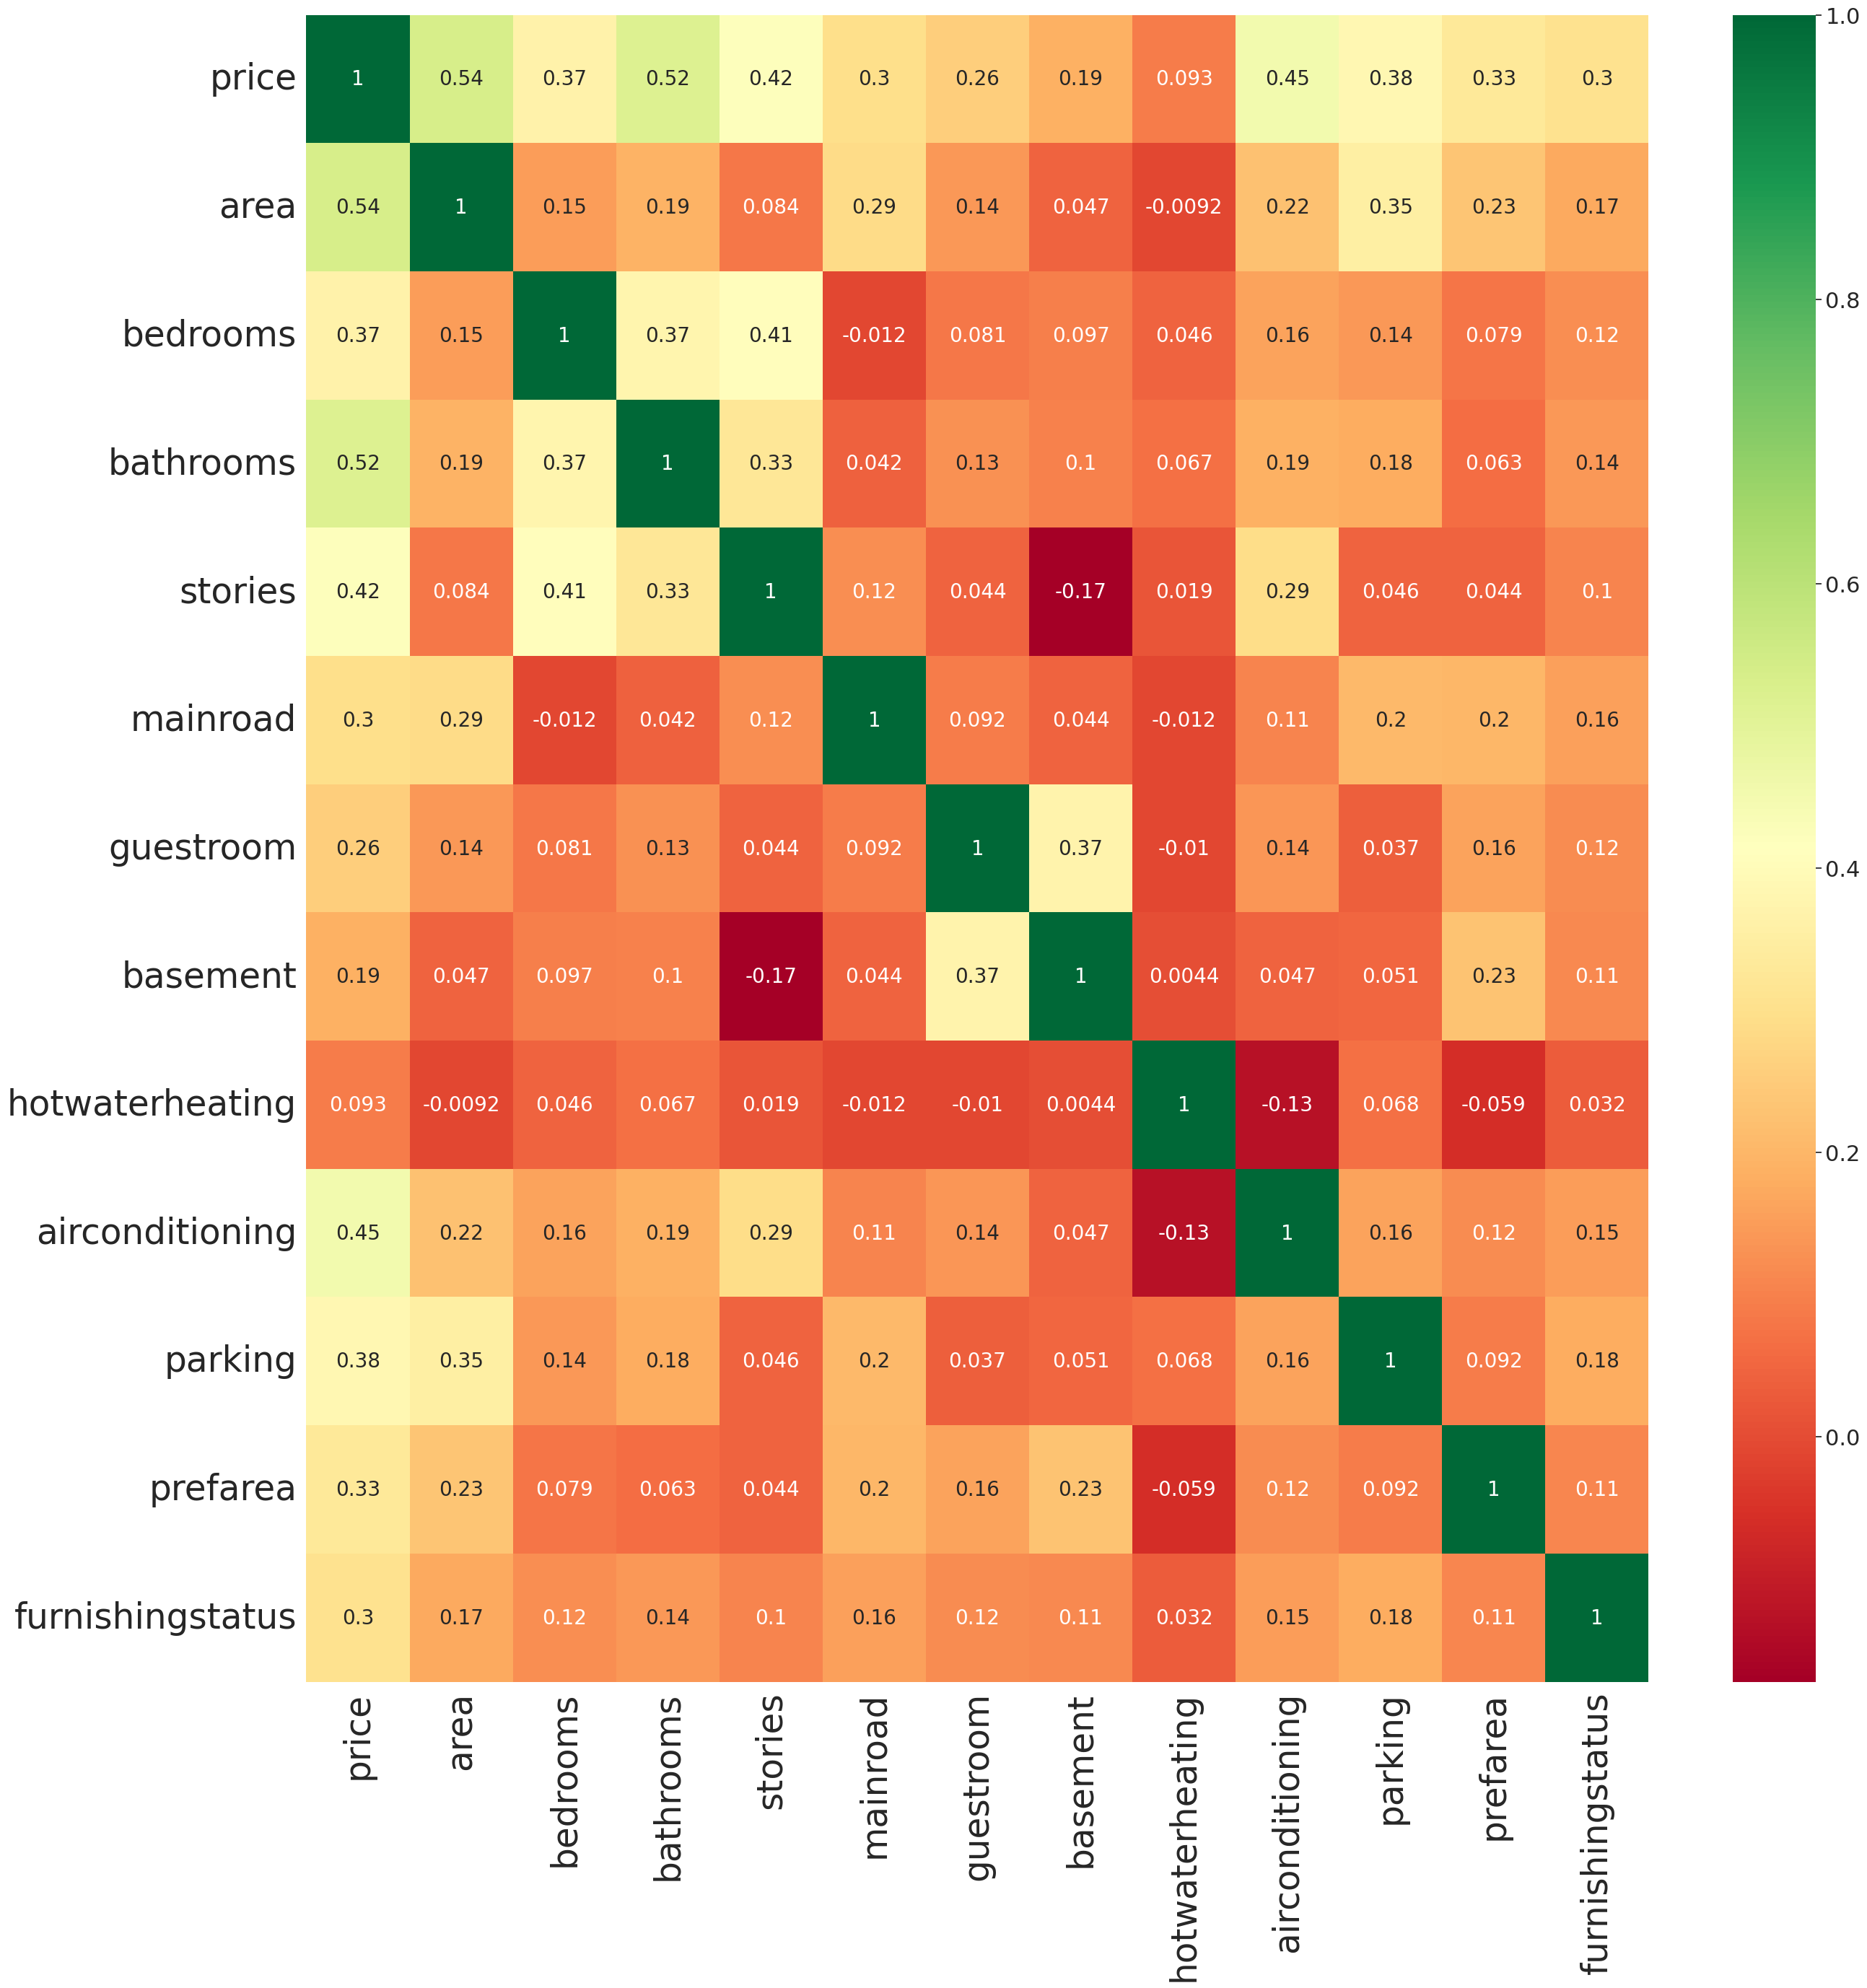

In [ ]:
sns.set(font_scale=2)
plt.subplots(figsize=(30,30))
heat_plot=sns.heatmap(df.corr(method='pearson'), annot=True, cmap='RdYlGn', annot_kws={'size': 20}) # Pearson correlation
plt.yticks(fontsize=35)
plt.xticks(fontsize=35)

plt.show()

In [ ]:
x=df.drop(['price'], axis=1)
y=df['price']

In [ ]:
print("Shape of X (Features): ", x.shape)
print("Shape of Y (Target): ", y.shape)

Shape of X (Features):  (545, 12)
Shape of Y (Target):  (545,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
print("Shape of Training Set: ", x_train.shape)
print("Shape of Testing Set: ", x_test.shape)

Shape of Training Set:  (436, 12)
Shape of Testing Set:  (109, 12)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [ ]:
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math

In [ ]:
R2 = r2_score(y_pred, y_test)
R2

0.5387837076732261

In [ ]:
MSE = mean_squared_error(y_pred, y_test)
MSE

1404605291838.5237

In [ ]:
RMSE = math.sqrt(MSE)
RMSE

1185160.4498288506

In [ ]:
MAE = mean_absolute_error(y_pred, y_test)
MAE

852736.3411298388

Is it possible to Increase the R2 Score or

# Support Vector Machine

In [ ]:
# Load Diabetics Dataset
diabetes_data=pd.read_csv('/content/drive/MyDrive/Assignment/diabetes.csv')

In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 519 non-null    float64
 1   Gender              519 non-null    object 
 2   Polyuria            520 non-null    object 
 3   Polydipsia          520 non-null    object 
 4   sudden weight loss  520 non-null    object 
 5   weakness            519 non-null    object 
 6   Polyphagia          520 non-null    object 
 7   Genital thrush      520 non-null    object 
 8   visual blurring     520 non-null    object 
 9   Itching             520 non-null    object 
 10  Irritability        520 non-null    object 
 11  delayed healing     520 non-null    object 
 12  partial paresis     520 non-null    object 
 13  muscle stiffness    520 non-null    object 
 14  Alopecia            520 non-null    object 
 15  Obesity             520 non-null    object 
 16  class   

In [ ]:
diabetes_data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,NaN,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45.0,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,600.0,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
# Check number of empty values
diabetes_data.isnull().sum()

Age                   1
Gender                1
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              1
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [ ]:
# Fill empty values
## Fill Age with Median Values
diabetes_data['Age'] = diabetes_data['Age'].fillna(diabetes_data['Age'].median())

## Fill Gender with the Most Frequesnt Category
most_frequent_category = diabetes_data['Gender'].mode().iloc[0]
diabetes_data['Gender'].fillna(most_frequent_category, inplace=True)

In [ ]:
diabetes_data.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              1
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [ ]:
# Encode Dataset
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in diabetes_data.iloc[:, 1:].columns:
    if diabetes_data[column].dtype == 'object':  # Apply Label Encoding only to object dtype columns
        # print(column)
        diabetes_data[column] = le.fit_transform(diabetes_data[column])

# Display the modified DataFrame
print(diabetes_data.head())

     Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0   40.0       1         0           1                   0         1   
1   58.0       1         0           0                   0         1   
2   48.0       1         1           0                   0         1   
3   45.0       1         0           0                   1         1   
4  600.0       1         1           1                   1         1   

   Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
0           0               0                0        1             0   
1           0               0                1        0             0   
2           1               0                0        1             0   
3           1               1                0        1             0   
4           1               0                1        1             1   

   delayed healing  partial paresis  muscle stiffness  Alopecia  Obesity  \
0                1                0                 

In [ ]:
# Count Number of Samples per Class
value_counts = diabetes_data.groupby('class').size().reset_index(name='Count')
print(value_counts)

   class  Count
0      0    200
1      1    320


### Notes:
The Z-score, also known as standard score or z-value, is a measure of how many standard deviations a particular data point is from the mean of a group of data. It is a dimensionless quantity and is often used in statistics to assess the relative position of a data point within a distribution.

The resulting Z-score indicates how many standard deviations a data point is from the mean. A Z-score of 0 means the data point's score is identical to the mean score, a Z-score of 1.0 means the data point is 1 standard deviation from the mean, a Z-score of 2.0 means it's 2 standard deviations from the mean, and so on.


In [ ]:
z_score = (diabetes_data['Age'] - diabetes_data['Age'].mean()) / diabetes_data['Age'].std()

In [ ]:
z_score.max(),z_score.min()

(20.3456818436221, -1.221686897681453)

In [ ]:
# Count number of Outliers
outlier = 0
for i in z_score:
  if i < -3 or i > 3:
    outlier +=1
  else:
    continue
print("Total Number of Outliers: ", outlier)


Total Number of Outliers:  1


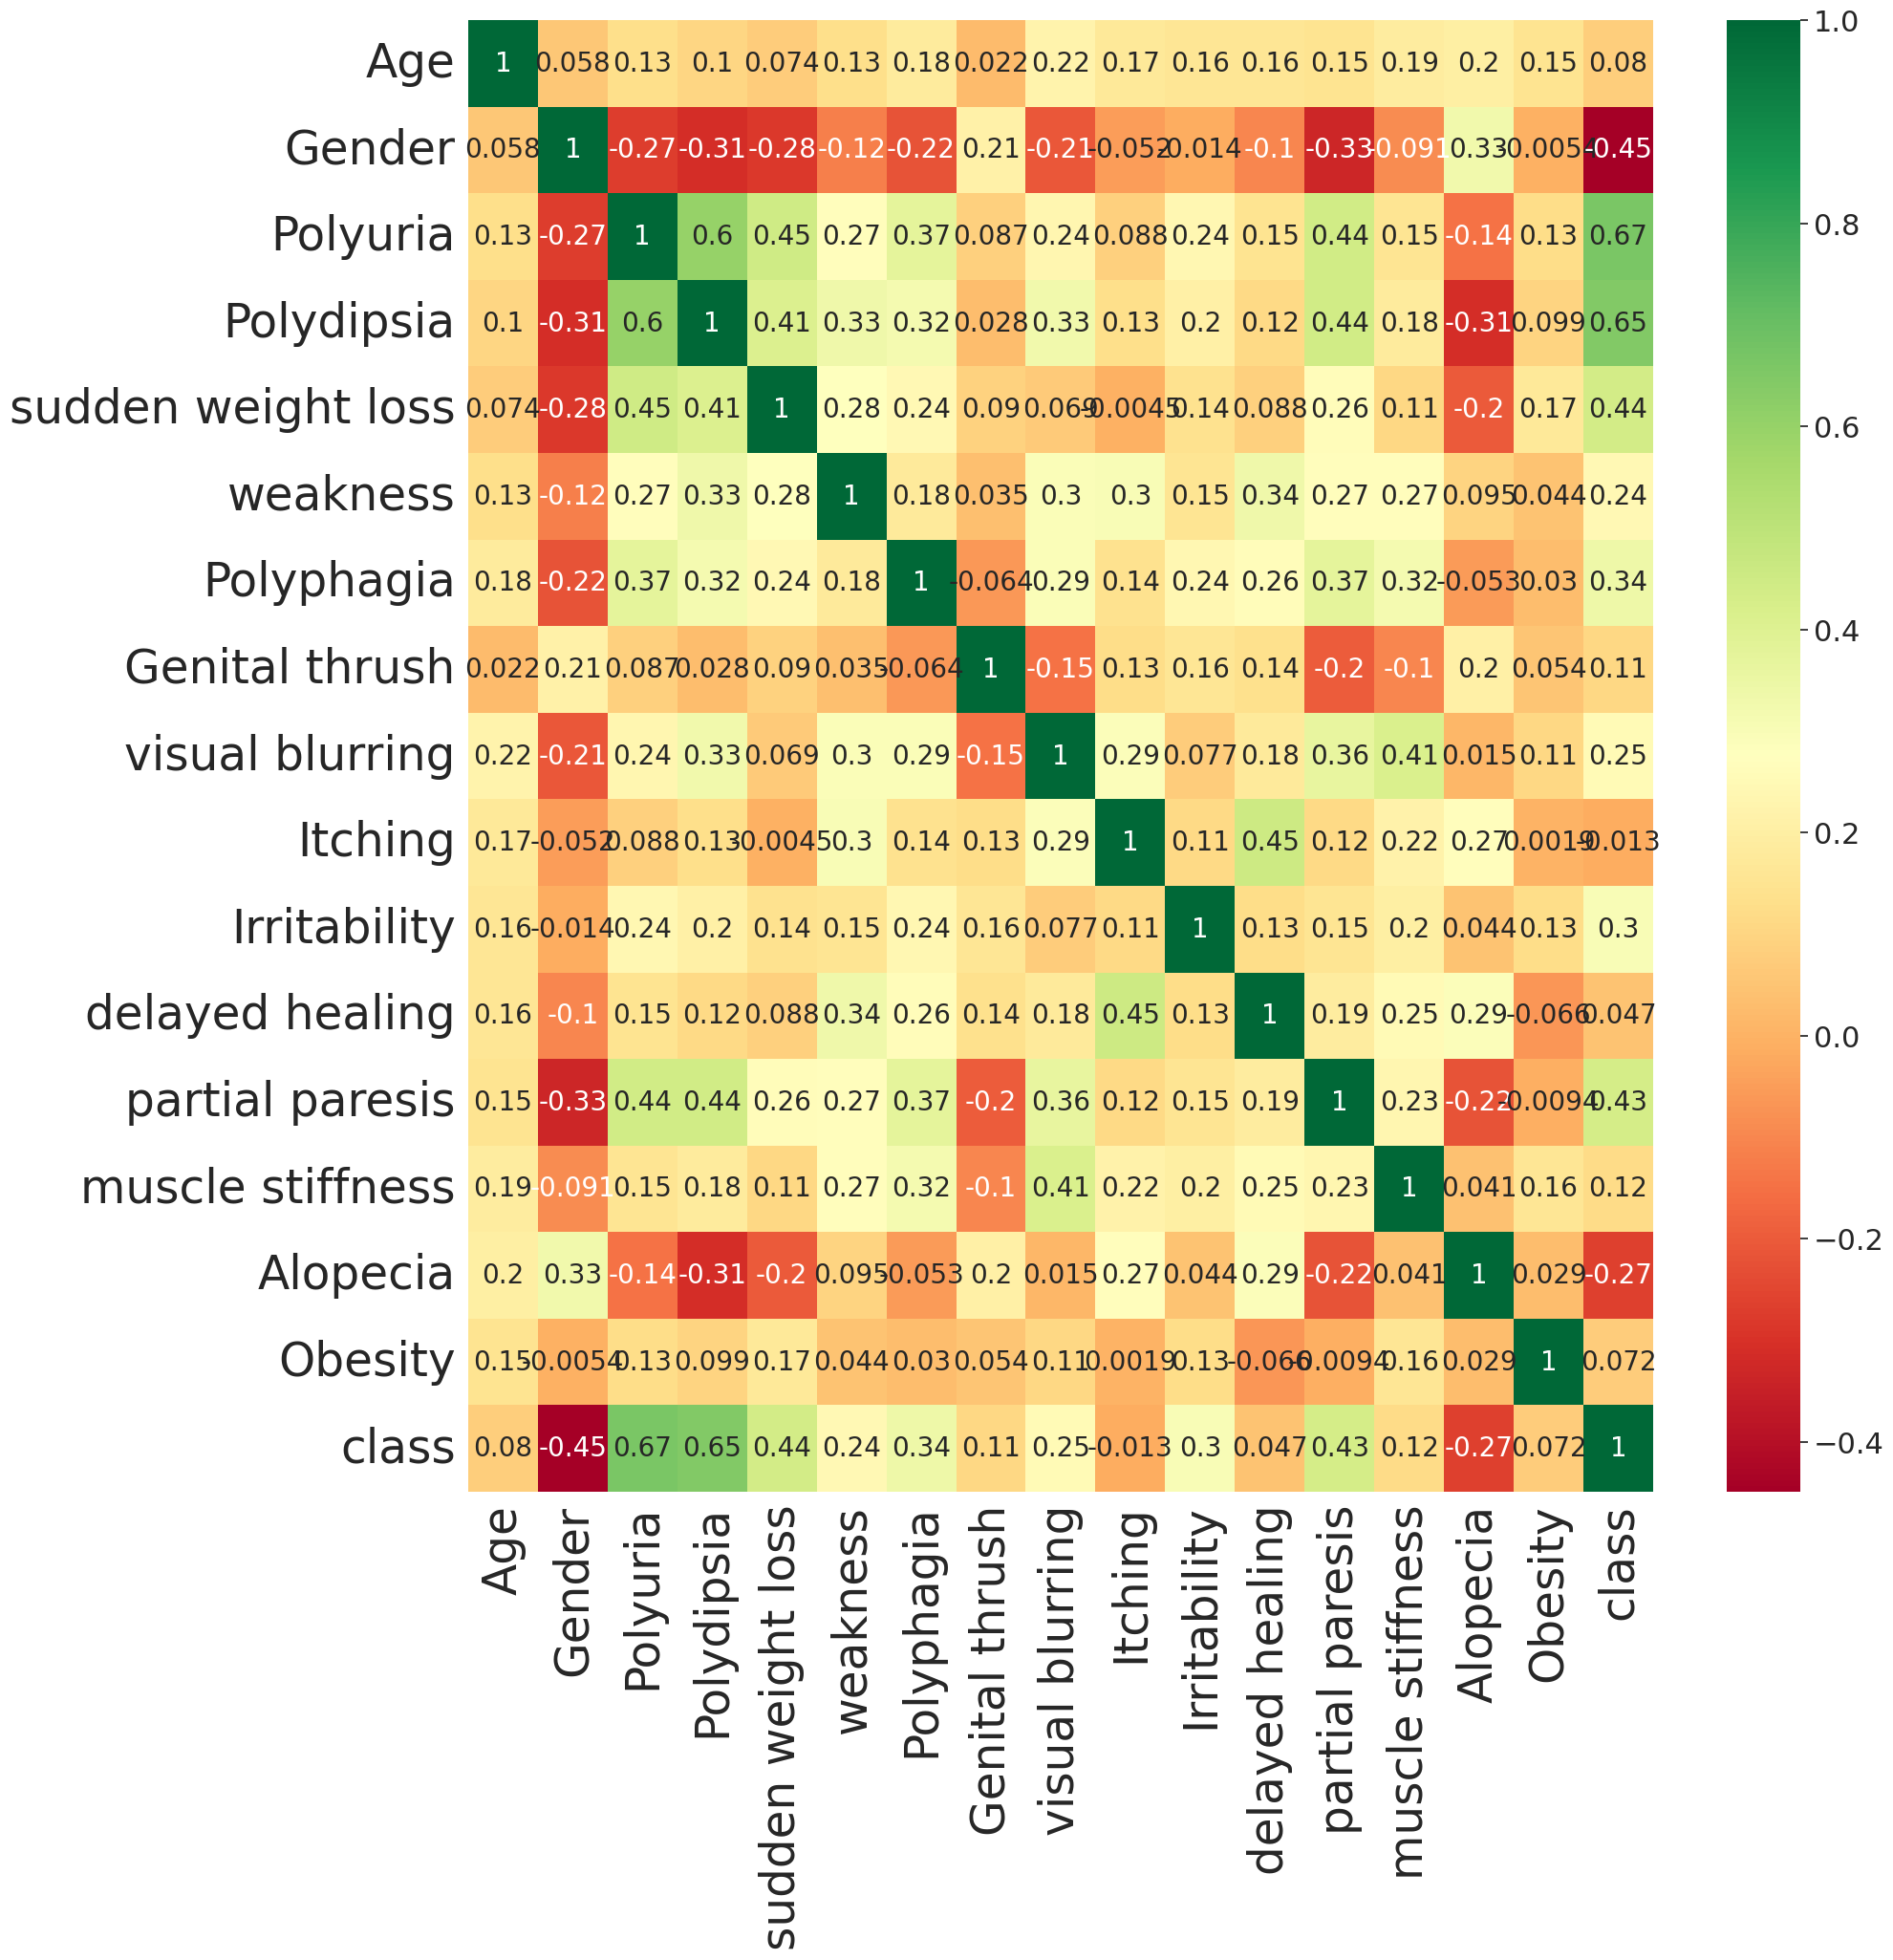

In [ ]:
sns.set(font_scale=2)
plt.subplots(figsize=(20,20))
heat_plot = sns.heatmap(diabetes_data.corr(method='pearson'), annot=True, cmap='RdYlGn', annot_kws={'size': 20})

plt.yticks(fontsize=35)
plt.xticks(fontsize=35)

plt.show()

In [ ]:
# Show correlation between class and other features
correlation = diabetes_data.corr(method='pearson')
print(correlation['class'].sort_values(ascending=False).to_string())

class                 1.000000
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
partial paresis       0.432288
Polyphagia            0.342504
Irritability          0.299467
visual blurring       0.251300
weakness              0.244598
muscle stiffness      0.122474
Genital thrush        0.110288
Age                   0.079512
Obesity               0.072173
delayed healing       0.046980
Itching              -0.013384
Alopecia             -0.267512
Gender               -0.449233


In [ ]:
# Shuffle the dataset
from sklearn.utils import shuffle
shuffled_diabetes_data = shuffle(diabetes_data)

rearranged_df = shuffled_diabetes_data.reset_index(drop=True)
rearranged_df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,54.0,1,1,1,1,1,0,1,0,0,0,1,0,1,0,0,1
1,40.0,1,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0
2,30.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,34.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,40.0,0,1,1,1,1,0,0,1,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,60.0,0,0,1,1,1,1,1,1,0,1,1,1,1,0,0,1
516,36.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
517,35.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
518,55.0,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1


In [ ]:
x = rearranged_df.drop(columns=['class'])
y = rearranged_df['class']


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
STD_scaler = StandardScaler()
STD_scaled_x = STD_scaler.fit_transform(x)
STD_scaled_x

array([[ 0.18184422,  0.76509206,  1.00772212, ...,  1.29099445,
        -0.72451824, -0.45133547],
       [-0.3356796 ,  0.76509206, -0.99233705, ...,  1.29099445,
        -0.72451824, -0.45133547],
       [-0.70533947,  0.76509206, -0.99233705, ..., -0.77459667,
        -0.72451824, -0.45133547],
       ...,
       [-0.52050954, -1.30703226, -0.99233705, ..., -0.77459667,
        -0.72451824, -0.45133547],
       [ 0.21881021, -1.30703226,  1.00772212, ..., -0.77459667,
        -0.72451824, -0.45133547],
       [-0.22478164,  0.76509206, -0.99233705, ..., -0.77459667,
         1.38022749, -0.45133547]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(STD_scaled_x, y, test_size=0.20)

In [ ]:
x_train

array([[ 0.21881021, -1.30703226,  1.00772212, ..., -0.77459667,
        -0.72451824,  2.21564684],
       [ 0.66240206,  0.76509206,  1.00772212, ...,  1.29099445,
         1.38022749,  2.21564684],
       [-0.52050954, -1.30703226,  1.00772212, ...,  1.29099445,
        -0.72451824, -0.45133547],
       ...,
       [-0.07691769, -1.30703226, -0.99233705, ...,  1.29099445,
        -0.72451824, -0.45133547],
       [-0.22478164,  0.76509206, -0.99233705, ..., -0.77459667,
         1.38022749, -0.45133547],
       [-0.81623743,  0.76509206, -0.99233705, ..., -0.77459667,
        -0.72451824, -0.45133547]])

In [ ]:
## Train SVC
from sklearn.svm import SVC

SVC_model = SVC(C=0.5, kernel='poly', degree=2, gamma='scale', coef0=0.0, tol=0.0001, decision_function_shape='ovr')

In [ ]:
## K-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

k_fold = KFold(10)
accuracy = cross_val_score(SVC_model, x_train, y_train, cv=k_fold, scoring='accuracy')
precision = cross_val_score(SVC_model, x_train, y_train, cv=k_fold, scoring='precision')
recall = cross_val_score(SVC_model, x_train, y_train, cv=k_fold, scoring='recall')
f1_score = cross_val_score(SVC_model, x_train, y_train, cv=k_fold, scoring='f1')
AUC = cross_val_score(SVC_model, x_train, y_train, cv=k_fold, scoring='roc_auc')

In [ ]:
overall_accuracy = sum(accuracy) / len(accuracy)
overall_accuracy

0.872822299651568

In [ ]:
overall_precision = sum(precision) / len(precision)
overall_precision

0.8702008605708551

In [ ]:
overall_recall = sum(recall) / len(recall)
overall_recall

0.93135564113825

In [ ]:
overall_f1_score = sum(f1_score) / len(f1_score)
overall_f1_score

0.8986767022422837

In [ ]:
overall_AUC = sum(AUC) / len(AUC)
overall_AUC

0.9447121182023654

In [ ]:
# Test Sample Performance
SVC_model = SVC(C=0.5, kernel='poly', degree=2, gamma='scale', coef0=0.0, tol=0.0001, decision_function_shape='ovr')
SVC_model.fit(x_train, y_train)
y_predict = SVC_model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("accuracy_score: ", accuracy_score(y_predict, y_test))
print("precision_score: ", precision_score(y_predict, y_test))
print("recall_score: ", recall_score(y_predict, y_test))
print("f1_score: ", f1_score(y_predict, y_test))
print("roc_auc_score: ", accuracy_score(y_predict, y_test))

accuracy_score:  0.8653846153846154
precision_score:  0.9411764705882353
recall_score:  0.8648648648648649
f1_score:  0.9014084507042254
roc_auc_score:  0.8653846153846154
